# Fuente de datos 2
## Plan Anual de Adquisiones - Secop II¶

**Configuración de algoritmo:**
- Lectura de datos en versión final, en formato .pickle.
- Descripción de tipo de datos.
- Cambio en nombres de variables.
- Identificación de valores únicos por variable.
- Creación de agrupación (clusters) con K-modes.
- Validación del número de clusters (k) óptimo con método Elbow y Silhouette.
- Combinar con los datos originales.
- Gráficos de barras para los clusters creados. 
- Exportar base de datos segmentada.

In [1]:
# Importar paquetes
import os,sys
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
import pickle 
import random

In [3]:
# Suprimir alertas
import warnings
warnings.filterwarnings('ignore')

# Librerias de vizualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from matplotlib.pyplot import xticks

In [4]:
# Importar librerias
from kmodes.kmodes import KModes
from sklearn import preprocessing

In [5]:
!pip install kmodes

In [6]:
! pip install yellowbrick

In [7]:
# Score Silueta para K modes
from yellowbrick.cluster import KElbowVisualizer

In [8]:
print(sys.path)

['C:\\Users\\David\\OneDrive\\EAFIT\\Proyecto Integrador 1\\Repositorios\\proy-segmentacion\\jupyter\\DavidRuaJ', 'C:\\Users\\David\\anaconda3\\python38.zip', 'C:\\Users\\David\\anaconda3\\DLLs', 'C:\\Users\\David\\anaconda3\\lib', 'C:\\Users\\David\\anaconda3', '', 'C:\\Users\\David\\anaconda3\\lib\\site-packages', 'C:\\Users\\David\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\David\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\David\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\David\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\David\\.ipython']


In [9]:
sys.path.append("C:\\Users\\David\\OneDrive\\EAFIT\\Proyecto Integrador 1\\Repositorios\\proy-segmentacion")

In [35]:
from root import DIR_DATA
from root import DIR_CONF
from root import DIR_ROOT

In [11]:
input_fuente2 = DIR_DATA + "03-Trusted/analisis_heuristico.pickle"

In [12]:
df=pickle.load( open(input_fuente2, "rb" ) )

In [13]:
# Validar los valores únicos de las variables
df.nunique(axis=0)
print(df.nunique(axis=0))

nit                       145
entidad_matriz            145
year                        4
entidad                   165
localizacion               35
localizacion_desc          15
mision_vision             219
pers_estrategica          198
ppto_global               243
mes_proyectado             12
precio_base               772
date_last_publication     124
ref_contrato             1178
date_publised              71
modalidad                   3
contacto                  205
cod_producto               67
nombre_producto            67
cod_clase                  44
nombre_clase               44
cod_familia                32
nombre_familia             32
diff_dates                117
year_publised               4
rango_precio                4
dtype: int64


## Nueva variable rango_precio:

In [14]:
df.shape

(1285, 25)

In [15]:
# Variable rango_precio
print('\033[1m' + "rango_precio" + '\033[0m')
print(df.rango_precio.unique())

rango_precio
['43.827.961-81804454', '81804454-2.9550.000.000', '0-21.000.000', '21.000.001-43.827.960']
Categories (4, object): ['0-21.000.000' < '21.000.001-43.827.960' < '43.827.961-81804454' < '81804454-2.9550.000.000']


En 'rango_precio' tenemos 4 categorías.

## K modes

In [16]:
df_cat=df[['entidad_matriz', 'localizacion_desc','mes_proyectado','modalidad','nombre_producto','nombre_clase','nombre_familia','rango_precio']]

In [17]:
df_cat.shape

(1285, 8)

In [18]:
# Validar valores nulos
df_cat.isnull().sum()*100/df_cat.shape[0]

entidad_matriz       0.0
localizacion_desc    0.0
mes_proyectado       0.0
modalidad            0.0
nombre_producto      0.0
nombre_clase         0.0
nombre_familia       0.0
rango_precio         0.0
dtype: float64

**Construcción del Modelo**

In [19]:
# Hacemos una copia de los datos
df_cat_copy = df_cat.copy()

In [20]:
le = preprocessing.LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
#df_cat.head()

### Usar K-Mode con inicialización "Cao"

In [21]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_cat)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 91, cost: 5405.0


In [22]:
# Predicción de Clusters
fitClusters_cao

array([0, 0, 1, ..., 0, 0, 1], dtype=uint16)

In [23]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_cat.columns

In [24]:
# Modos de los clústers
clusterCentroidsDf

,entidad_matriz,localizacion_desc,mes_proyectado,modalidad,nombre_producto,nombre_clase,nombre_familia,rango_precio
0,20,6,3,2,24,23,20,3
1,90,6,3,2,41,13,30,0


### Usar K-Mode con inicialización "Huang"

In [25]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df_cat)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 94, cost: 5560.0
Run 1, iteration: 2/100, moves: 226, cost: 5301.0
Run 1, iteration: 3/100, moves: 0, cost: 5301.0


In [26]:
# Predicción de Clusters
fitClusters_huang

array([0, 1, 0, ..., 0, 0, 0], dtype=uint16)

**Seleccionar K comparando Costo contra cada K**

In [27]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_cat)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6287.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 91, cost: 5405.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 81, cost: 4766.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 158, cost: 4273.0
Run 1, iteration: 2/100, moves: 1, cost: 4273.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 115, cost: 4084.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 96, cost: 4002.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 202, cost: 3783.0
Run 1, iteration: 2/100, moves: 52, cost: 3783.

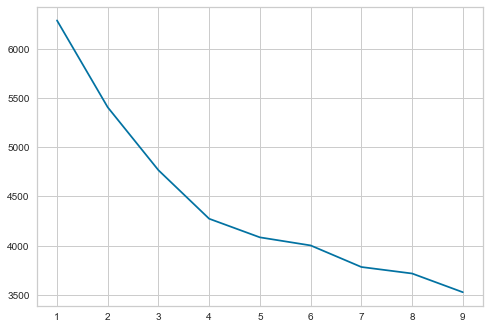

In [36]:
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)
plt.savefig(DIR_ROOT + '/img/codo01.png')

In [34]:

print(DIR_ROOT)

C:\Users\David\OneDrive\EAFIT\Proyecto Integrador 1\Repositorios\proy-segmentacion


Al buscar un cambio de pendiente de empinada a poca profundidad (elbow), para determinar el número óptimo de clústeres, encontramos el primero en $K=2$, el segundo en $k=3$ y el tercero en $k=4$. Seleccionamos $k=3$. 

## Método Silueta

Un coeficiente de Silueta **+1** indica que la muestra está muy lejos de los clusters vecinos.

Un coeficiente de Silueta de **0** indica que la muestra está muy cerca o sobre el límite de decisión entre dos clusters vecinos.

Un coeficiente de Silueta **<0** indica que la muestra pueden estar asignadas al cluster equivocado o que son outliers.

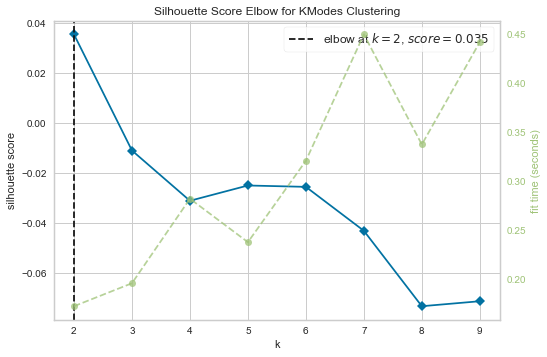

<AxesSubplot:title={'center':'Silhouette Score Elbow for KModes Clustering'}, xlabel='k', ylabel='silhouette score'>

In [31]:
model = KModes()
# k es el rango de números de clústers.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(df_cat)        # Ajustar los datos al vizualizador
visualizer.show()        # Finalizar la figura
plt.savefig(DIR_ROOT + '/img/silueta01.png')

**Seleccionamos K=2**

In [33]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_cat)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 91, cost: 5405.0


In [34]:
fitClusters_cao

array([0, 0, 1, ..., 0, 0, 1], dtype=uint16)

**Combinmos el clúster predecido con el DF original.**

In [35]:
df_cat = df_cat_copy.reset_index()

In [36]:
clustersdf = pd.DataFrame(fitClusters_cao)
clustersdf.columns = ['cluster_predicted']
combineddf = pd.concat([df_cat, clustersdf], axis = 1).reset_index()
combineddf = combineddf.drop(['index', 'level_0'], axis = 1)

In [37]:
#combineddf.head()

,entidad_matriz,localizacion_desc,mes_proyectado,modalidad,nombre_producto,nombre_clase,nombre_familia,rango_precio,cluster_predicted
0,EMPRESAS PUBLICAS DEL QUINDIO SA ESP,Quindío,Enero,CCE-16-Servicios_profesionales_gestion,Sistema y accesorios de conexión cruzada de co...,Dispositivos y equipos para instalación de con...,Equipos o plataformas y accesorios de redes mu...,43.827.961-81804454,0
1,DIRECCION EJECUTIVA DE ADMINISTRACION JUDICIAL,Distrito Capital de Bogotá,Septiembre,CCE-06-Seleccion_Abreviada_Menor_Cuantia,Mantenimiento de software de sistemas de gesti...,Mantenimiento y soporte de software,Servicios informáticos,81804454-2.9550.000.000,0
2,MUNICIPIO DE SACAMA,Casanare,Febrero,CCE-16-Servicios_profesionales_gestion,Sistemas de información ambiental,Auditoría ambiental,Gestión medioambiental,0-21.000.000,1
3,DIRECCION TERRITORIAL DE SALUD DE CALDAS,Caldas,Enero,CCE-16-Servicios_profesionales_gestion,Servicios de archivo de datos,Servicios de apoyo gerencial,Servicios de administración de empresas,0-21.000.000,0
4,DIRECCION TERRITORIAL DE SALUD DE CALDAS,Caldas,Enero,CCE-16-Servicios_profesionales_gestion,Servicios de archivo de datos,Servicios de apoyo gerencial,Servicios de administración de empresas,0-21.000.000,0


### Identificación de Cluster 

In [38]:
cluster_0 = combineddf[combineddf['cluster_predicted'] == 0]
cluster_1 = combineddf[combineddf['cluster_predicted'] == 1]

In [39]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 0 to 1283
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   entidad_matriz     925 non-null    object  
 1   localizacion_desc  925 non-null    object  
 2   mes_proyectado     925 non-null    object  
 3   modalidad          925 non-null    object  
 4   nombre_producto    925 non-null    object  
 5   nombre_clase       925 non-null    object  
 6   nombre_familia     925 non-null    object  
 7   rango_precio       925 non-null    category
 8   cluster_predicted  925 non-null    uint16  
dtypes: category(1), object(7), uint16(1)
memory usage: 60.7+ KB


In [40]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 2 to 1284
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   entidad_matriz     360 non-null    object  
 1   localizacion_desc  360 non-null    object  
 2   mes_proyectado     360 non-null    object  
 3   modalidad          360 non-null    object  
 4   nombre_producto    360 non-null    object  
 5   nombre_clase       360 non-null    object  
 6   nombre_familia     360 non-null    object  
 7   rango_precio       360 non-null    category
 8   cluster_predicted  360 non-null    uint16  
dtypes: category(1), object(7), uint16(1)
memory usage: 23.7+ KB


## Gráficos de Barras

**Descripción de localización**

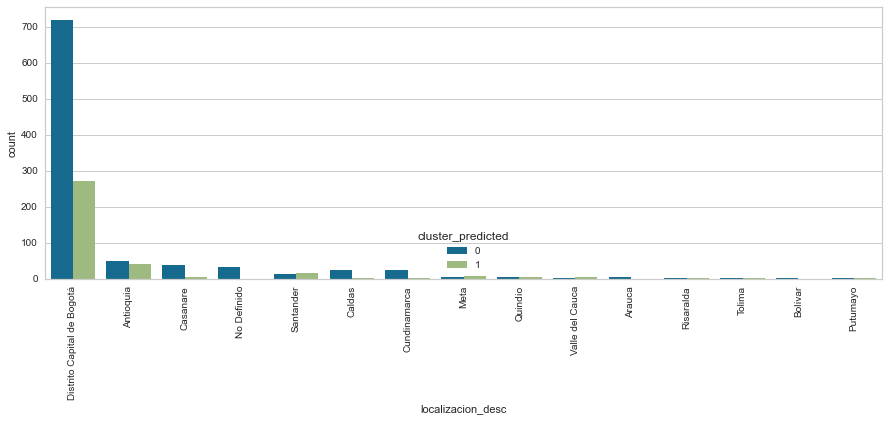

In [41]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combineddf['localizacion_desc'],order=combineddf['localizacion_desc'].value_counts().index,hue=combineddf['cluster_predicted'])
plt.xticks(rotation='vertical')
plt.show()
plt.savefig(DIR_ROOT + '/img/Localizacion01.png')

**Mes proyectado**

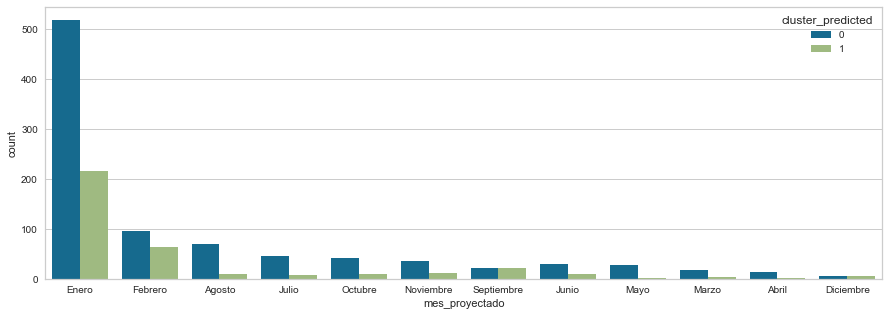

In [42]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combineddf['mes_proyectado'],order=combineddf['mes_proyectado'].value_counts().index,hue=combineddf['cluster_predicted'])
plt.show()
plt.savefig(DIR_ROOT + '/img/Mes_proyectado01.png')

**Modalidad**

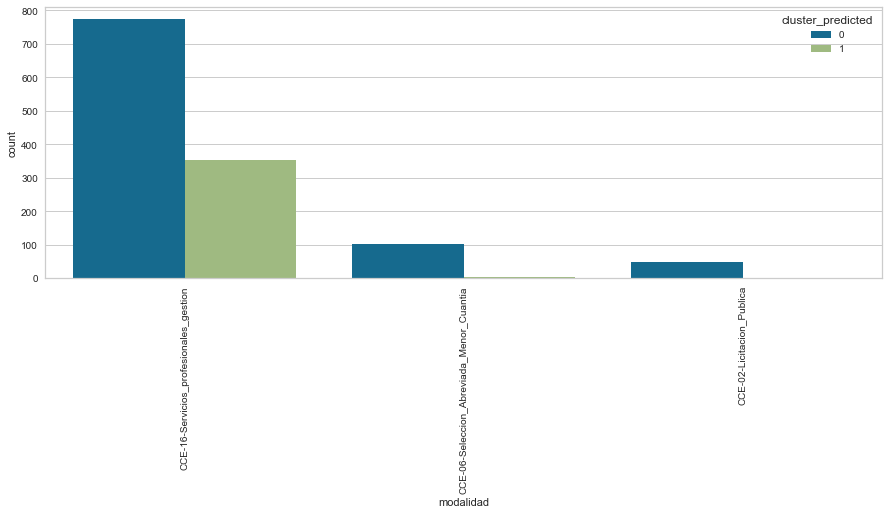

In [43]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combineddf['modalidad'],order=combineddf['modalidad'].value_counts().index,hue=combineddf['cluster_predicted'])
plt.xticks(rotation='vertical')
plt.show()
plt.savefig(DIR_ROOT + '/img/Modalidad01.png')

**Rango de Precio**

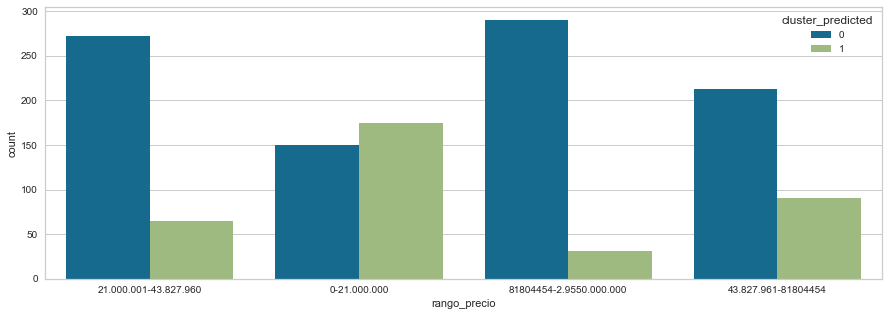

In [44]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combineddf['rango_precio'],order=combineddf['rango_precio'].value_counts().index,hue=combineddf['cluster_predicted'])
plt.show()
plt.savefig(DIR_ROOT + '/img/Rango_precio01.png')

In [45]:
#combineddf.head()

,entidad_matriz,localizacion_desc,mes_proyectado,modalidad,nombre_producto,nombre_clase,nombre_familia,rango_precio,cluster_predicted
0,EMPRESAS PUBLICAS DEL QUINDIO SA ESP,Quindío,Enero,CCE-16-Servicios_profesionales_gestion,Sistema y accesorios de conexión cruzada de co...,Dispositivos y equipos para instalación de con...,Equipos o plataformas y accesorios de redes mu...,43.827.961-81804454,0
1,DIRECCION EJECUTIVA DE ADMINISTRACION JUDICIAL,Distrito Capital de Bogotá,Septiembre,CCE-06-Seleccion_Abreviada_Menor_Cuantia,Mantenimiento de software de sistemas de gesti...,Mantenimiento y soporte de software,Servicios informáticos,81804454-2.9550.000.000,0
2,MUNICIPIO DE SACAMA,Casanare,Febrero,CCE-16-Servicios_profesionales_gestion,Sistemas de información ambiental,Auditoría ambiental,Gestión medioambiental,0-21.000.000,1
3,DIRECCION TERRITORIAL DE SALUD DE CALDAS,Caldas,Enero,CCE-16-Servicios_profesionales_gestion,Servicios de archivo de datos,Servicios de apoyo gerencial,Servicios de administración de empresas,0-21.000.000,0
4,DIRECCION TERRITORIAL DE SALUD DE CALDAS,Caldas,Enero,CCE-16-Servicios_profesionales_gestion,Servicios de archivo de datos,Servicios de apoyo gerencial,Servicios de administración de empresas,0-21.000.000,0


## Vista de clusters final

In [65]:
df_fin = df.reset_index()

In [66]:
df_fin = df_fin.drop(['index'], axis = 1)

In [67]:
cluster_predicted=combineddf["cluster_predicted"]
df_fin = df_fin.join(cluster_predicted)

In [69]:
df_fin.head()

,nit,entidad_matriz,year,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_global,mes_proyectado,...,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia,diff_dates,year_publised,rango_precio,cluster_predicted
0,800063823,EMPRESAS PUBLICAS DEL QUINDIO SA ESP,2019,EMPRESAS PUBLICAS DEL QUINDIO SA ESP,CO-QUI-63001,Quindío,"MISIÓN Empresas Públicas del Quindío, EPQ SA E...",Ejecutar alternativas de acción que logren lle...,11686350896,Enero,...,V1.43223301,Sistema y accesorios de conexión cruzada de co...,V1.43223300,Dispositivos y equipos para instalación de con...,V1.43220000,Equipos o plataformas y accesorios de redes mu...,0,2019,43.827.961-81804454,0
1,800093816,DIRECCION EJECUTIVA DE ADMINISTRACION JUDICIAL,2019,Rama Judicial  Dirección Ejecutiva de Adminis...,CO-DC-11001,Distrito Capital de Bogotá,MISION: Dar cumplimiento al mandato constituci...,"Garantizar la publicidad, concurrencia y parti...",271627572050,Septiembre,...,V1.81112205,Mantenimiento de software de sistemas de gesti...,V1.81112200,Mantenimiento y soporte de software,V1.81110000,Servicios informáticos,316,2019,81804454-2.9550.000.000,0
2,800103663,MUNICIPIO DE SACAMA,2019,MUNICIPIO DE SACAMA,CO-CAS-85315,Casanare,MISION: Direccionar la gestión del Municipio c...,El Plan Anual de Adquisiciones es un documento...,1933451706,Febrero,...,V1.77101801,Sistemas de información ambiental,V1.77101800,Auditoría ambiental,V1.77100000,Gestión medioambiental,11,2019,0-21.000.000,1
3,800114312,DIRECCION TERRITORIAL DE SALUD DE CALDAS,2019,DIRECCIÓN TERRITORIAL DE SALUD DE CALDAS,CO-CAL-17001,Caldas,MISIÓN: Realizar acciones de Asistencia Técnic...,Para dar cumplimiento con el Plan de Desarrol...,51750899436,Enero,...,V1.80161506,Servicios de archivo de datos,V1.80161500,Servicios de apoyo gerencial,V1.80160000,Servicios de administración de empresas,358,2018,0-21.000.000,0
4,800114312,DIRECCION TERRITORIAL DE SALUD DE CALDAS,2019,DIRECCIÓN TERRITORIAL DE SALUD DE CALDAS,CO-CAL-17001,Caldas,MISIÓN: Realizar acciones de Asistencia Técnic...,Para dar cumplimiento con el Plan de Desarrol...,51750899436,Enero,...,V1.80161506,Servicios de archivo de datos,V1.80161500,Servicios de apoyo gerencial,V1.80160000,Servicios de administración de empresas,358,2018,0-21.000.000,0


In [70]:
df_fin.shape

(1285, 26)

## Exportar base de datos segmentada

In [71]:
df_fin.to_csv(DIR_DATA + '04-Refined/Cluster_final01.csv')

In [72]:
df_fin.to_pickle(DIR_DATA + '04-Refined/Cluster_final01.pickle')

## Fin cluster